In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import ppscore as pps
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
%matplotlib inline

In [3]:
df = pd.read_excel('loan.xlsx')

In [4]:
df.tail()

Member_ID  systemloanid  Gender Married Dependents     Education  \
94  LP001325     301978868    Male      No          0  Not Graduate   
95  LP001326     302001119    Male      No          0      Graduate   
96  LP001327     301966525  Female     Yes          0      Graduate   
97  LP001333     301994809    Male     Yes          0      Graduate   
98  LP001334     301981912    Male     Yes          0  Not Graduate   

   Self_Employed  ApplicantIncome  CoapplicantIncome  loanamount  totaldue  \
94            No             3620                  0       20000     21900   
95           NaN             6782                  0       10000     11500   
96            No             2484               2302       40000     44800   
97            No             1977                997       40000     44800   
98            No             4188                  0       40000     44000   

   effective_date             due_date        paid_off_time ReferredBy  \
94     2016-11-09  2016-10-10 00:00:00  2016-10-10 13:00:00   LP001097   
95     2016-11-09  2016-10-10 00:00:00  2016-08-10 20:49:00   LP001098   
96     2016-11-09            9/25/2016       9/20/2016 5:38   LP001099   
97     2016-11-09  2016-10-10 00:00:00  2016-10-10 09:01:00   LP001100   
98     2016-11-09  2016-10-10 00:00:00  2016-10-10 09:01:00   LP001101   

    Loan_Amount_Term Credit_History Property_Area Loan_Status    Purpose  
94             120.0           Good     Semiurban           Y        car  
95             360.0           Good         Urban           N   business  
96             360.0            Bad     Semiurban           Y  education  
97             360.0           Good     Semiurban           Y   business  
98             180.0           Good     Semiurban           Y   radio/TV

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Member_ID          99 non-null     object        
 1   systemloanid       99 non-null     int64         
 2   Gender             98 non-null     object        
 3   Married            99 non-null     object        
 4   Dependents         99 non-null     object        
 5   Education          99 non-null     object        
 6   Self_Employed      93 non-null     object        
 7   ApplicantIncome    99 non-null     int64         
 8   CoapplicantIncome  99 non-null     int64         
 9   loanamount         99 non-null     int64         
 10  totaldue           99 non-null     int64         
 11  effective_date     99 non-null     datetime64[ns]
 12  due_date           99 non-null     object        
 13  paid_off_time      99 non-null     object        
 14  ReferredBy  

### Data Cleaning and Feature Engineering

In [226]:
memory_stats()

Memory
Index                 128
Gender                792
Married               792
Dependents            792
Education             792
SelfEmployed          792
ApplicantIncome       792
CoapplicantIncome     792
LoanAmount            792
TotalDue              792
LoanAmountTerm        792
CreditHistory         792
PropertyArea          792
LoanStatus            792
Purpose               792
PaidMin               792
PaidHour              792
PaidDay               792
PaidMonth             792
DueMonth              792
DueDay                792
EffectiveDay          792

In [6]:
display(df.iloc[1])

Member_ID                       LP001003
systemloanid                   301965204
Gender                              Male
Married                              Yes
Dependents                             1
Education                       Graduate
Self_Employed                         No
ApplicantIncome                     4583
CoapplicantIncome                   1508
loanamount                         10000
totaldue                           13000
effective_date       2016-08-09 00:00:00
due_date             2016-07-10 00:00:00
paid_off_time        2016-07-10 09:00:00
ReferredBy                      LP001004
Loan_Amount_Term                     360
Credit_History                      Good
Property_Area                      Rural
Loan_Status                            N
Purpose                         radio/TV
Name: 1, dtype: object

In [9]:
df.isna().sum()

Member_ID            0
systemloanid         0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        6
ApplicantIncome      0
CoapplicantIncome    0
loanamount           0
totaldue             0
effective_date       0
due_date             0
paid_off_time        0
ReferredBy           0
Loan_Amount_Term     5
Credit_History       0
Property_Area        0
Loan_Status          0
Purpose              0
dtype: int64

In [7]:
df.isna().any()

Member_ID            False
systemloanid         False
Gender                True
Married              False
Dependents           False
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
loanamount           False
totaldue             False
effective_date       False
due_date             False
paid_off_time        False
ReferredBy           False
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
Purpose              False
dtype: bool

In [8]:
df.duplicated().any()

False

In [10]:
def transform_datetime(col_name: str, new_col_name: str, how=None):
  if how == 'month':
    df[new_col_name] = pd.DatetimeIndex(df[col_name]).month
  elif how == 'year':
    df[new_col_name] = pd.DatetimeIndex(df[col_name]).year
  elif how == 'day':
    df[new_col_name] = pd.DatetimeIndex(df[col_name]).day
  elif how == 'hour':
    df[new_col_name] = pd.DatetimeIndex(df[col_name]).hour
  elif how == 'minute':
    df[new_col_name] = pd.DatetimeIndex(df[col_name]).minute
  elif how == 'second':
    df[new_col_name] = pd.DatetimeIndex(df[col_name]).second
  else:
    df[new_col_name] = pd.DatetimeIndex(df[col_name]).date
  return df.head(3)

In [11]:
transform_datetime('paid_off_time', 'paid_second', how='second')
transform_datetime('paid_off_time', 'paid_minute', how='minute')
transform_datetime('paid_off_time', 'paid_hour', how='hour')
transform_datetime('paid_off_time', 'paid_day', how='day')
transform_datetime('paid_off_time', 'paid_month', how=' month')
transform_datetime('paid_off_time', 'paid_year', how='year')
transform_datetime('paid_off_time', 'paid_date')
transform_datetime('due_date', 'due_date')
transform_datetime('due_date', 'DueSec', how='second')
transform_datetime('due_date', 'DueMin', how='minute')
transform_datetime('due_date', 'DueHour', how='hour')
transform_datetime('due_date', 'DueMonth', how='month')
transform_datetime('due_date', 'DueYear', how='year')
transform_datetime('due_date', 'DueDay', how='day')
transform_datetime('effective_date', 'EffectiveMonth', how='month')
transform_datetime('effective_date', 'EffectiveYear', how='year')
transform_datetime('effective_date', 'EffectiveDay', how='day')
transform_datetime('effective_date', 'effective_date')

Member_ID  systemloanid Gender Married Dependents Education Self_Employed  \
0  LP001002     301994762   Male      No          0  Graduate            No   
1  LP001003     301965204   Male     Yes          1  Graduate            No   
2  LP001005     301966580   Male     Yes          0  Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  loanamount  ...   paid_date DueSec  \
0             5849                  0       10000  ...  2016-09-14      0   
1             4583               1508       10000  ...  2016-07-10      0   
2             3000                  0       20000  ...  2016-09-25      0   

  DueMin DueHour DueMonth  DueYear DueDay EffectiveMonth EffectiveYear  \
0      0       0        7     2016     10              8          2016   
1      0       0        7     2016     10              8          2016   
2      0       0        7     2016     10              8          2016   

  EffectiveDay  
0            9  
1            9  
2            9  

[3 rows x 36 columns]

In [12]:
df['paid_month'] = pd.DatetimeIndex(df['paid_off_time']).month

In [15]:
drp = ['systemloanid', 'EffectiveYear', 'DueYear', 'DueHour', 'DueMin', 'DueSec',
       'paid_year', 'paid_second', 'Member_ID', 'ReferredBy', 'effective_date',
       'due_date', 'paid_date', 'paid_off_time', 'EffectiveMonth']
df.drop(drp, axis=1, inplace=True)

In [17]:
num_cols = list(df.describe().columns)
cat_cols = list(set(df.columns).difference(num_cols))
irrelevant = ['systemloanid', 'RefferedBy', 'Member_ID']
numerical = [e for e in num_cols if e not in irrelevant]

In [18]:
categorical_cols = []

for k, v in df.iteritems():
  if v.dtype == 'object':
    categorical_cols.append(k)
print(categorical_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status', 'Purpose']


In [21]:
df.fillna(method='bfill', inplace=True)

In [22]:
df.head(20)

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0     Male      No          0      Graduate            No             5849   
1     Male     Yes          1      Graduate            No             4583   
2     Male     Yes          0      Graduate           Yes             3000   
3     Male     Yes          0  Not Graduate            No             2583   
4     Male      No          0      Graduate            No             6000   
5     Male     Yes          2      Graduate           Yes             5417   
6     Male     Yes          0  Not Graduate            No             2333   
7     Male     Yes         3+      Graduate            No             3036   
8     Male     Yes          2      Graduate            No             4006   
9     Male     Yes          1      Graduate            No            12841   
10    Male     Yes          2      Graduate            No             3200   
11    Male     Yes          2      Graduate            No             2500   
12    Male     Yes          2      Graduate            No             3073   
13    Male      No          0      Graduate            No             1853   
14    Male     Yes          2      Graduate            No             1299   
15    Male      No          0      Graduate            No             4950   
16    Male      No          1  Not Graduate            No             3596   
17  Female      No          0      Graduate            No             3510   
18    Male     Yes          0  Not Graduate            No             4887   
19    Male     Yes          0      Graduate            No             2600   

    CoapplicantIncome  loanamount  totaldue  Loan_Amount_Term  ...  \
0                   0       10000     13000             360.0  ...   
1                1508       10000     13000             360.0  ...   
2                   0       20000     23800             360.0  ...   
3                2358       10000     11500             360.0  ...   
4                   0       10000     11500             360.0  ...   
5                4196       20000     23800             360.0  ...   
6                1516       30000     39000             360.0  ...   
7                2504       20000     24500             360.0  ...   
8                1526       10000     13000             360.0  ...   
9               10968       10000     11500             360.0  ...   
10                700       30000     34400             360.0  ...   
11               1840       10000     11500             360.0  ...   
12               8106       10000     13000             360.0  ...   
13               2840       20000     21900             360.0  ...   
14               1086       30000     34400             120.0  ...   
15                  0       30000     34400             360.0  ...   
16                  0       10000     11500             240.0  ...   
17                  0       30000     34400             360.0  ...   
18                  0       10000     13000             360.0  ...   
19               3500       10000     13000             360.0  ...   

   Property_Area Loan_Status              Purpose paid_minute  paid_hour  \
0          Urban           Y             radio/TV          31         19   
1          Rural           N             radio/TV           0          9   
2          Urban           Y            education          58         16   
3          Urban           Y  furniture/equipment           0         20   
4          Urban           Y                  car          36         21   
5          Urban           Y            education          45         13   
6          Urban           Y  furniture/equipment           7         23   
7      Semiurban           N                  car          33         20   
8          Urban           Y             radio/TV           0         16   
9      Semiurban           N                  car           0         13   
10         Urban           Y                  car         

In [23]:
df.isna().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
loanamount           False
totaldue             False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
Purpose              False
paid_minute          False
paid_hour            False
paid_day             False
paid_month           False
DueMonth             False
DueDay               False
EffectiveDay         False
dtype: bool

In [26]:
df.rename(columns={
    'Self_Employed': 'SelfEmployed',
    'loanamount': 'LoanAmount',
    'totaldue': 'TotalDue',
    'Loan_Amount_Term': 'LoanAmountTerm',
    'Credit_History': 'CreditHistory',
    'Property_Area': 'PropertyArea',
    'Loan_Status': 'LoanStatus',
    'paid_minute': 'PaidMin',
    'paid_second': 'PaidSec',
    'paid_hour': 'PaidHour',
    'paid_month': 'PaidMonth',
    'paid_day': 'PaidDay'
}, inplace=True)

In [31]:
def pps_heatmap(df):
    '''
        Function for calculating the Predictive Power Score and plotting a heatmap
            Args:
                Pandas DataFrame or Series object
            __________
            Returns:
                figure
    '''
    pps_mtrx = pps.matrix(df)
    pps_mtrx1 = pps_mtrx[['x', 'y', 'ppscore']].pivot(columns='x', index='y',
                                              values='ppscore')
    plt.figure(figsize = (15, 8))
    ax = sb.heatmap(pps_mtrx1, vmin=0, vmax=1, cmap="afmhot_r", linewidths=0.5,
                    annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

In [35]:
def count_values(col_name: str, kind: str):
  vc = df[col_name].value_counts()
  plt.figure(figsize=(24, 8))
  vc.plot(kind=kind)
  plt.show()
  return vc

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             99 non-null     object 
 1   Married            99 non-null     object 
 2   Dependents         99 non-null     object 
 3   Education          99 non-null     object 
 4   SelfEmployed       99 non-null     object 
 5   ApplicantIncome    99 non-null     int64  
 6   CoapplicantIncome  99 non-null     int64  
 7   LoanAmount         99 non-null     int64  
 8   TotalDue           99 non-null     int64  
 9   LoanAmountTerm     99 non-null     float64
 10  CreditHistory      99 non-null     object 
 11  PropertyArea       99 non-null     object 
 12  LoanStatus         99 non-null     object 
 13  Purpose            99 non-null     object 
 14  PaidMin            99 non-null     int64  
 15  PaidHour           99 non-null     int64  
 16  PaidDay            99 non-nu

In [39]:
def plot_boxplot(df):
  plt.figure(figsize=(24, 8))
  sb.boxplot(data=df)
  plt.show()

In [43]:
import plotly.express as px

In [47]:
df2 = df.copy()

In [24]:
objs = df.select_dtypes(include='object')

In [25]:
for k, v in objs.iteritems():
  print(k, v.unique())

Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents [0 1 2 '3+' 3]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Credit_History ['Good' 'Bad']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']
Purpose ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [48]:
gen = {'Male': 0, 'Female': 1}
mar = {'No': 0, 'Yes': 1}
dep = {0: 0, 1: 1, 2: 2, 3: 3, '3+': 4}
ed = {'Not Graduate': 0, 'Graduate': 1}
self = {'No': 0, 'Yes': 1}
credit = {'Bad': 0, 'Good': 1}
stats = {'N': 0, 'Y': 1}
area = {'Rural': 0, 'Urban': 1, 'Semiurban': 3}
purp = {
    'radio/TV': 0,
    'education': 1,
    'furniture/equipment': 2,
    'car': 3,
    'business': 4,
    'domestic appliances': 5,
    'repairs': 6,
    'vacation/others': 7
}

In [49]:
df['Gender'] = df['Gender'].map(gen)
df['Married'] = df['Married'].map(mar)
df['Education'] = df['Education'].map(ed)
df['SelfEmployed'] = df['SelfEmployed'].map(self)
df['Dependents'] = df['Dependents'].map(dep)
df['CreditHistory'] = df['CreditHistory'].map(credit)
df['LoanStatus'] = df['LoanStatus'].map(stats)
df['PropertyArea'] = df['PropertyArea'].map(area)
df['Purpose'] = df['Purpose'].map(purp)

In [50]:
df.tail()

Gender  Married  Dependents  Education  SelfEmployed  ApplicantIncome  \
94       0        0           0          0             0             3620   
95       0        0           0          1             0             6782   
96       1        1           0          1             0             2484   
97       0        1           0          1             0             1977   
98       0        1           0          0             0             4188   

    CoapplicantIncome  LoanAmount  TotalDue  LoanAmountTerm  ...  \
94                  0       20000     21900           120.0  ...   
95                  0       10000     11500           360.0  ...   
96               2302       40000     44800           360.0  ...   
97                997       40000     44800           360.0  ...   
98                  0       40000     44000           180.0  ...   

    PropertyArea  LoanStatus  Purpose  PaidMin  PaidHour  PaidDay  PaidMonth  \
94             3           1        3        0        13       10         10   
95             1           0        4       49        20       10          8   
96             3           1        1       38         5       20          9   
97             3           1        4        1         9       10         10   
98             3           1        0        1         9       10         10   

    DueMonth  DueDay  EffectiveDay  
94        10      10             9  
95        10      10             9  
96         9      25             9  
97        10      10             9  
98        10      10             9  

[5 rows x 21 columns]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             99 non-null     int64  
 1   Married            99 non-null     int64  
 2   Dependents         99 non-null     int64  
 3   Education          99 non-null     int64  
 4   SelfEmployed       99 non-null     int64  
 5   ApplicantIncome    99 non-null     int64  
 6   CoapplicantIncome  99 non-null     int64  
 7   LoanAmount         99 non-null     int64  
 8   TotalDue           99 non-null     int64  
 9   LoanAmountTerm     99 non-null     float64
 10  CreditHistory      99 non-null     int64  
 11  PropertyArea       99 non-null     int64  
 12  LoanStatus         99 non-null     int64  
 13  Purpose            99 non-null     int64  
 14  PaidMin            99 non-null     int64  
 15  PaidHour           99 non-null     int64  
 16  PaidDay            99 non-nu

In [224]:
def memory_stats():
    return pd.DataFrame(
        df.memory_usage(deep=True),
        columns=['Memory']
    )

### Exploratory Data Analysis

In [225]:
memory_stats()

Memory
Index                 128
Gender                792
Married               792
Dependents            792
Education             792
SelfEmployed          792
ApplicantIncome       792
CoapplicantIncome     792
LoanAmount            792
TotalDue              792
LoanAmountTerm        792
CreditHistory         792
PropertyArea          792
LoanStatus            792
Purpose               792
PaidMin               792
PaidHour              792
PaidDay               792
PaidMonth             792
DueMonth              792
DueDay                792
EffectiveDay          792

In [228]:
df.describe()

Gender    Married  Dependents  Education  SelfEmployed  \
count  99.000000  99.000000   99.000000  99.000000     99.000000   
mean    0.151515   0.686869    0.808081   0.767677      0.141414   
std     0.360375   0.466127    1.192466   0.424463      0.350222   
min     0.000000   0.000000    0.000000   0.000000      0.000000   
25%     0.000000   0.000000    0.000000   1.000000      0.000000   
50%     0.000000   1.000000    0.000000   1.000000      0.000000   
75%     0.000000   1.000000    1.500000   1.000000      0.000000   
max     1.000000   1.000000    4.000000   1.000000      1.000000   

       ApplicantIncome  CoapplicantIncome    LoanAmount      TotalDue  \
count        99.000000          99.000000     99.000000     99.000000   
mean       4146.707071        1681.959596  17878.787879  21106.818182   
std        2257.670884        1948.642976   9397.429878  10354.797036   
min        1000.000000           0.000000  10000.000000  11125.000000   
25%        2676.500000           0.000000  10000.000000  13000.000000   
50%        3600.000000        1526.000000  10000.000000  13000.000000   
75%        4725.000000        2347.000000  20000.000000  24500.000000   
max       12841.000000       10968.000000  40000.000000  44800.000000   

       LoanAmountTerm  ...  PropertyArea  LoanStatus    Purpose    PaidMin  \
count       99.000000  ...     99.000000   99.000000  99.000000  99.000000   
mean       342.424242  ...      1.717172    0.636364   2.040404  18.282828   
std         60.154409  ...      1.097682    0.483494   1.834584  19.093775   
min         60.000000  ...      0.000000    0.000000   0.000000   0.000000   
25%        360.000000  ...      1.000000    0.000000   0.000000   0.000000   
50%        360.000000  ...      1.000000    1.000000   2.000000  12.000000   
75%        360.000000  ...      3.000000    1.000000   3.000000  34.500000   
max        480.000000  ...      3.000000    1.000000   7.000000  58.000000   

        PaidHour    PaidDay  PaidMonth   DueMonth     DueDay  EffectiveDay  
count  99.000000  99.000000  99.000000  99.000000  99.000000          99.0  
mean   13.686869  17.000000   8.929293   9.252525  16.181818           9.0  
std     5.271499   7.016017   1.162795   0.675269   7.007814           0.0  
min     0.000000   9.000000   3.000000   7.000000  10.000000           9.0  
25%     9.000000  10.000000   9.000000   9.000000  10.000000           9.0  
50%    13.000000  15.000000   9.000000   9.000000  10.000000           9.0  
75%    17.500000  24.000000   9.000000  10.000000  25.000000           9.0  
max    23.000000  30.000000  12.000000  10.000000  25.000000           9.0  

[8 rows x 21 columns]

In [53]:
df.corr()

Gender   Married  Dependents  Education  SelfEmployed  \
Gender             1.000000 -0.261390   -0.169094   0.165760     -0.090649   
Married           -0.261390  1.000000    0.313012  -0.113567      0.211512   
Dependents        -0.169094  0.313012    1.000000  -0.109148      0.212250   
Education          0.165760 -0.113567   -0.109148   1.000000     -0.119950   
SelfEmployed      -0.090649  0.211512    0.212250  -0.119950      1.000000   
ApplicantIncome   -0.053937 -0.026957    0.125140   0.124245      0.104599   
CoapplicantIncome -0.147420  0.250708    0.124653   0.125935     -0.061908   
LoanAmount         0.035609 -0.013412    0.017936   0.028682     -0.031944   
TotalDue           0.038619 -0.005473    0.028060   0.042618     -0.032064   
LoanAmountTerm     0.124096 -0.023599   -0.115785   0.318015     -0.113310   
CreditHistory     -0.120598 -0.000598   -0.094152  -0.111578     -0.136822   
PropertyArea       0.238412  0.024576   -0.002914   0.032740     -0.001072   
LoanStatus        -0.090508  0.123483   -0.016090  -0.018080      0.005478   
Purpose           -0.055656  0.062676   -0.024405   0.103904     -0.088391   
PaidMin            0.001123 -0.268549    0.009131   0.188234      0.189279   
PaidHour          -0.044599 -0.152435   -0.029137  -0.000921      0.046338   
PaidDay            0.080716  0.003120    0.052445   0.027412     -0.074750   
PaidMonth          0.171933 -0.078919   -0.054041   0.028401     -0.075424   
DueMonth           0.092758 -0.102822   -0.091265  -0.042433     -0.023099   
DueDay             0.134439  0.045721    0.087252   0.017776     -0.093736   
EffectiveDay            NaN       NaN         NaN        NaN           NaN   

                   ApplicantIncome  CoapplicantIncome  LoanAmount  TotalDue  \
Gender                   -0.053937          -0.147420    0.035609  0.038619   
Married                  -0.026957           0.250708   -0.013412 -0.005473   
Dependents                0.125140           0.124653    0.017936  0.028060   
Education                 0.124245           0.125935    0.028682  0.042618   
SelfEmployed              0.104599          -0.061908   -0.031944 -0.032064   
ApplicantIncome           1.000000           0.084797   -0.152410 -0.157086   
CoapplicantIncome         0.084797           1.000000   -0.073319 -0.076337   
LoanAmount               -0.152410          -0.073319    1.000000  0.994594   
TotalDue                 -0.157086          -0.076337    0.994594  1.000000   
LoanAmountTerm            0.009028           0.033228    0.030851  0.035972   
CreditHistory             0.059473          -0.095009    0.076486  0.080997   
PropertyArea             -0.078497           0.082181    0.099520  0.093919   
LoanStatus               -0.112649          -0.038583   -0.036750 -0.030021   
Purpose                   0.154702           0.089173   -0.083759 -0.104034   
PaidMin                   0.027775          -0.053911    0.047735  0.062762   
PaidHour                  0.044637           0.013727   -0.091818 -0.086957   
PaidDay                   0.054739           0.116835    0.088216  0.087125   
PaidMonth                 0.026225          -0.169743   -0.041880 -0.054622   
DueMonth                 -0.053055          -0.062658    0.004873 -0.014039   
DueDay                    0.055794           0.133351    0.108181  0.112230   
EffectiveDay                   NaN                NaN         NaN       NaN   

                   LoanAmountTerm  ...  PropertyArea  LoanStatus   Purpose  \
Gender                   0.124096  ...      0.238412   -0.090508 -0.055656   
Married                 -0.023599  ...      0.024576    0.123483  0.062676   
Dependents              -0.115785  ...     -0.002914   -0.016090 -0.024405   
Education                0.318015  ...      0.032740   -0.018080  0.103904   
SelfEmployed            -0.113310  ...     -0.001072    0.005478 -0.088391   
ApplicantIncome          0.009028  ...     -0.078497   -0.112649  0.154702   
CoapplicantIncome  

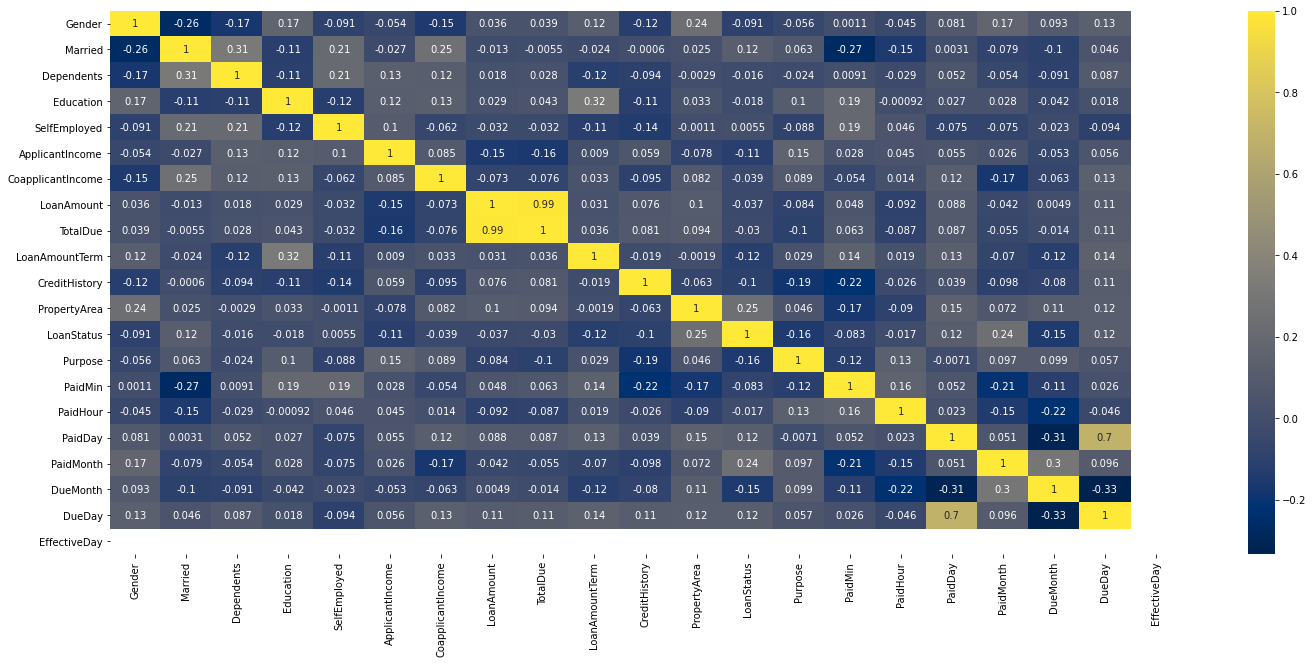

In [54]:
plt.figure(figsize=(24, 10))
sb.heatmap(df.corr(), annot=True, cmap='cividis')
plt.show()

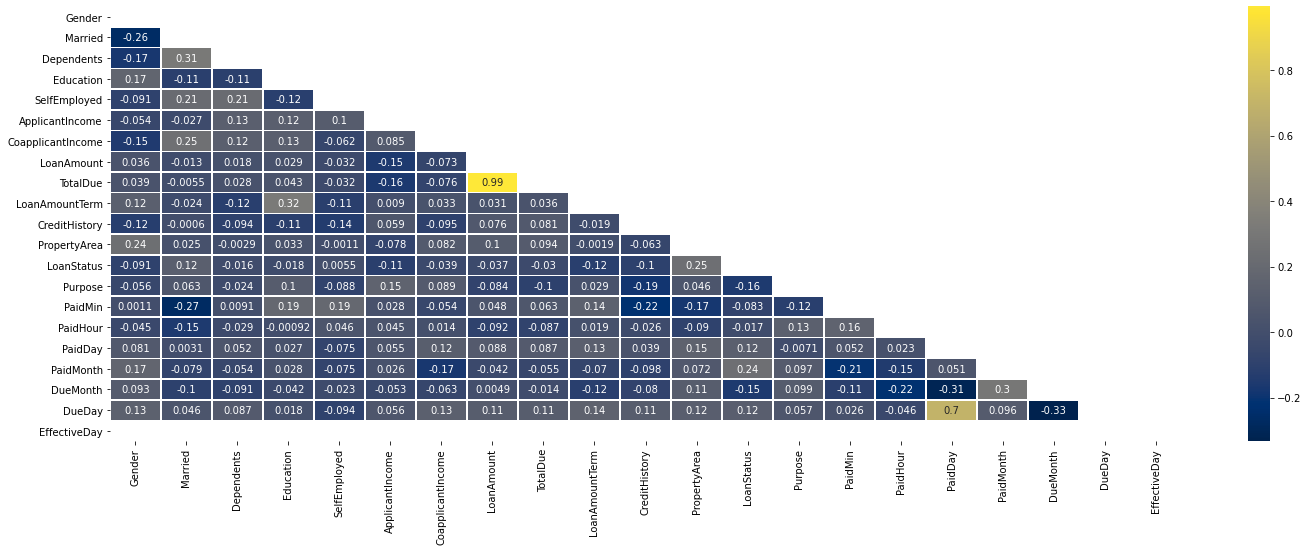

In [55]:
plt.figure(figsize=(24, 8))
# Create mask
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate Custom diverging cmap
sb.heatmap(df.corr(), annot=True, cmap='cividis', linewidth=.5,
           mask=mask)
plt.show()

<AxesSubplot:title={'center':'PPS matrix'}, xlabel='feature', ylabel='target'>

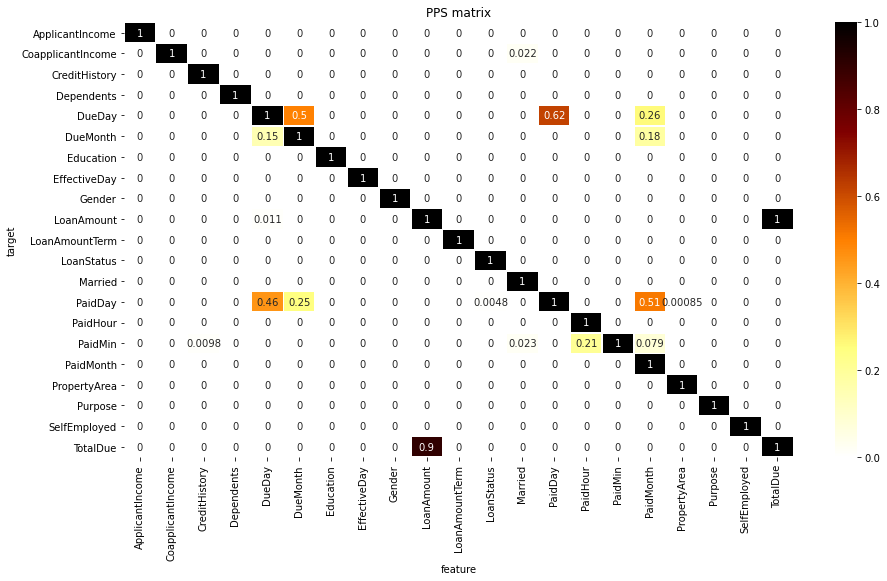

In [56]:
pps_heatmap(df)

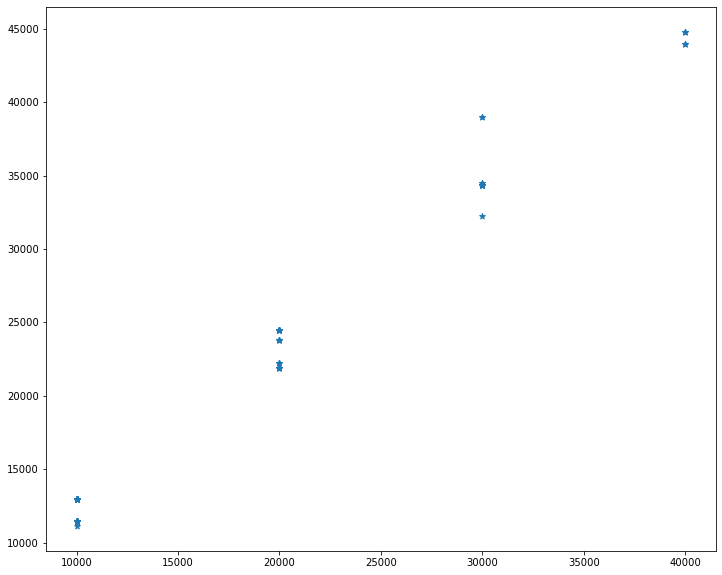

In [57]:
plt.figure(figsize=(12, 10))
plt.scatter(x='LoanAmount', y='TotalDue', cmap='cividis', marker='*', data=df)
plt.show()

In [44]:
px.scatter(
    df, x='ApplicantIncome', y='LoanAmount', size='TotalDue', color='Gender'
)

In [45]:
colors = ['#BA4053', '#8FD5D1', '#EE6A27', '#EB4156', '#BC5545', '#B16EAF']
px.sunburst(
    df, path=['Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed',
              'CreditHistory', 'PropertyArea', 'LoanStatus', 'Purpose'], 
            values='ApplicantIncome', color='ApplicantIncome',
            color_continuous_scale=colors
)

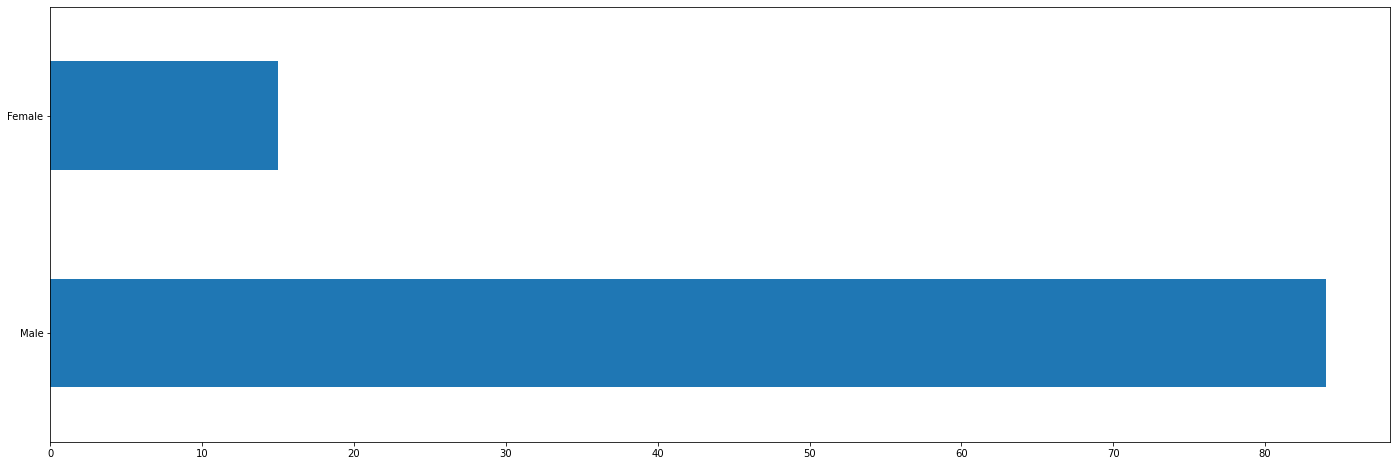

Male      84
Female    15
Name: Gender, dtype: int64


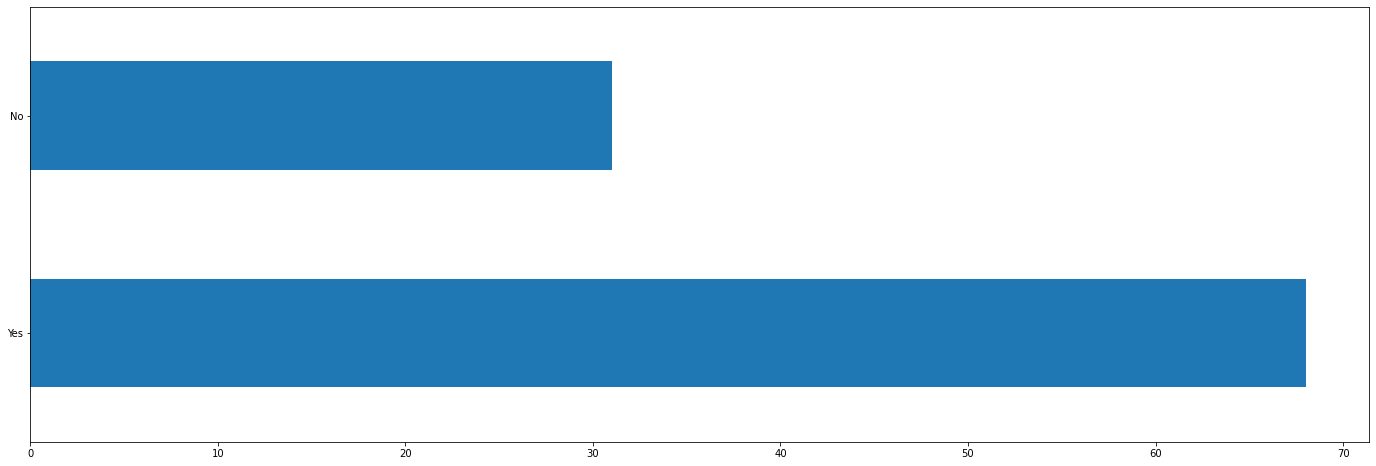

Yes    68
No     31
Name: Married, dtype: int64


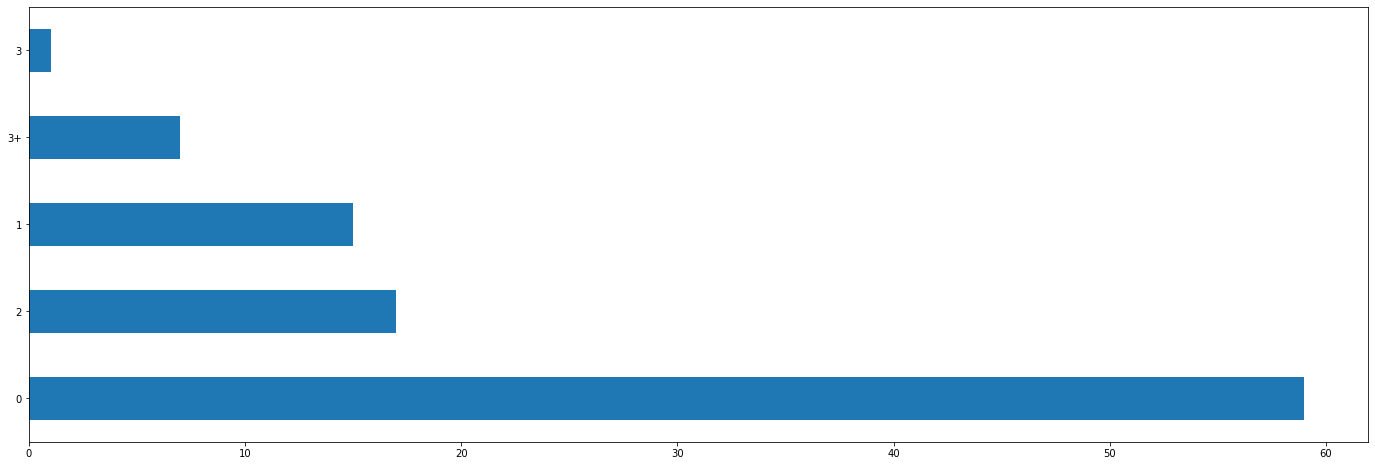

0     59
2     17
1     15
3+     7
3      1
Name: Dependents, dtype: int64


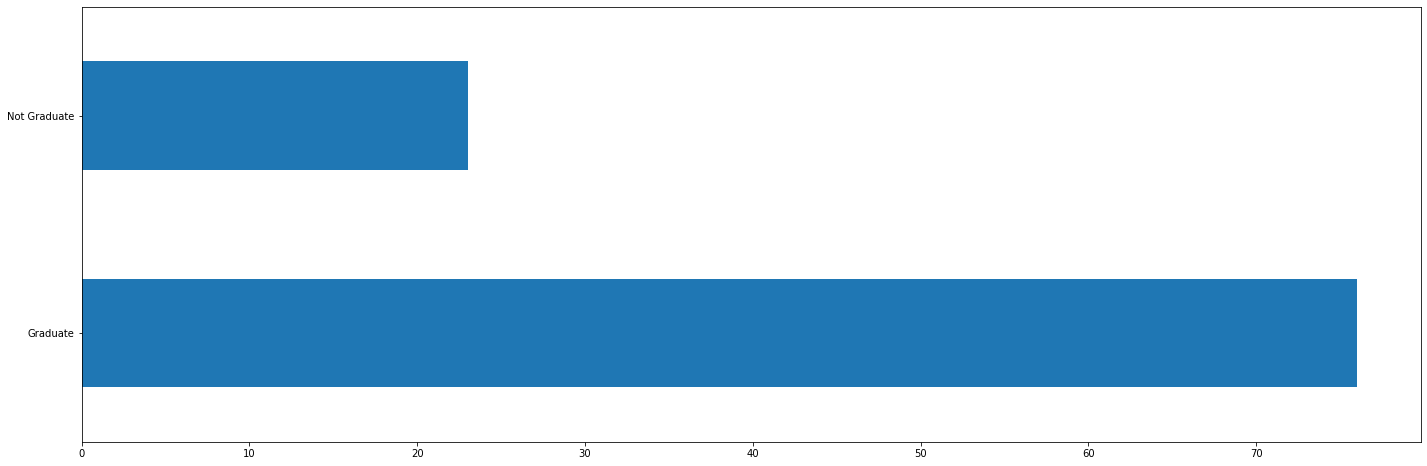

Graduate        76
Not Graduate    23
Name: Education, dtype: int64


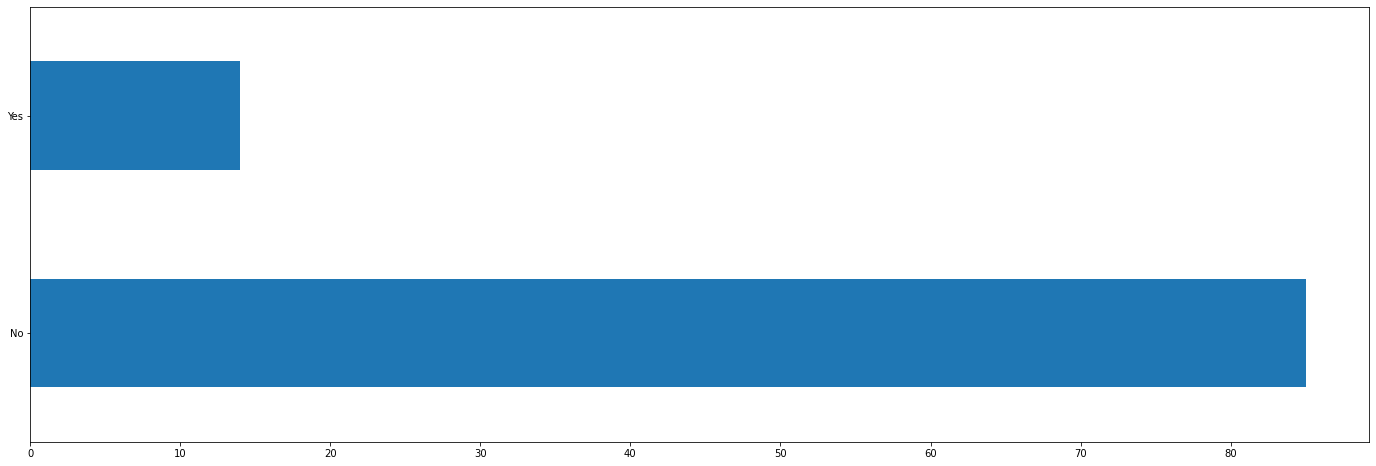

No     85
Yes    14
Name: SelfEmployed, dtype: int64


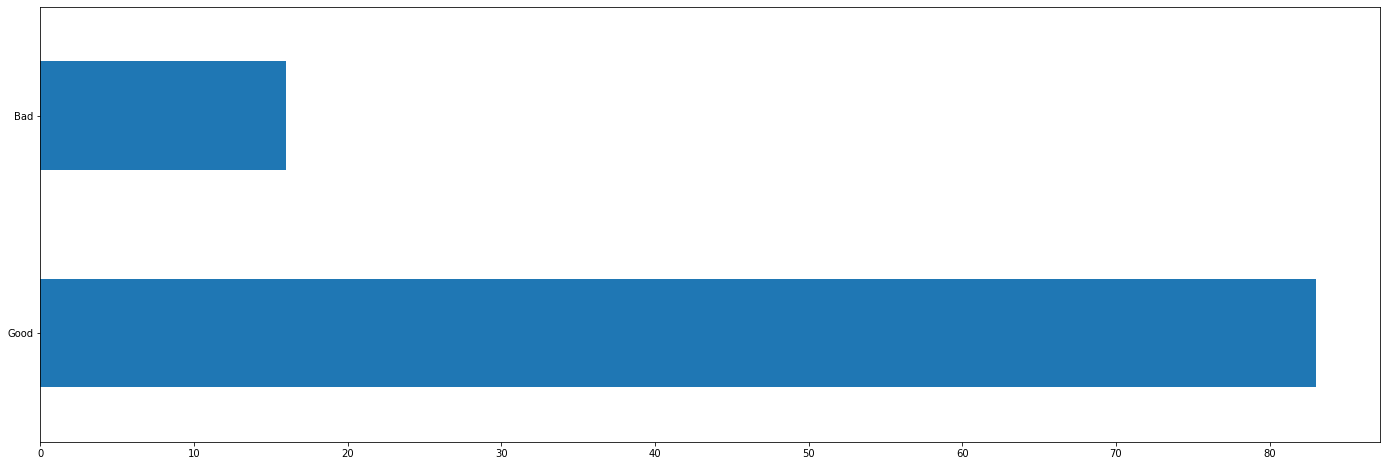

Good    83
Bad     16
Name: CreditHistory, dtype: int64


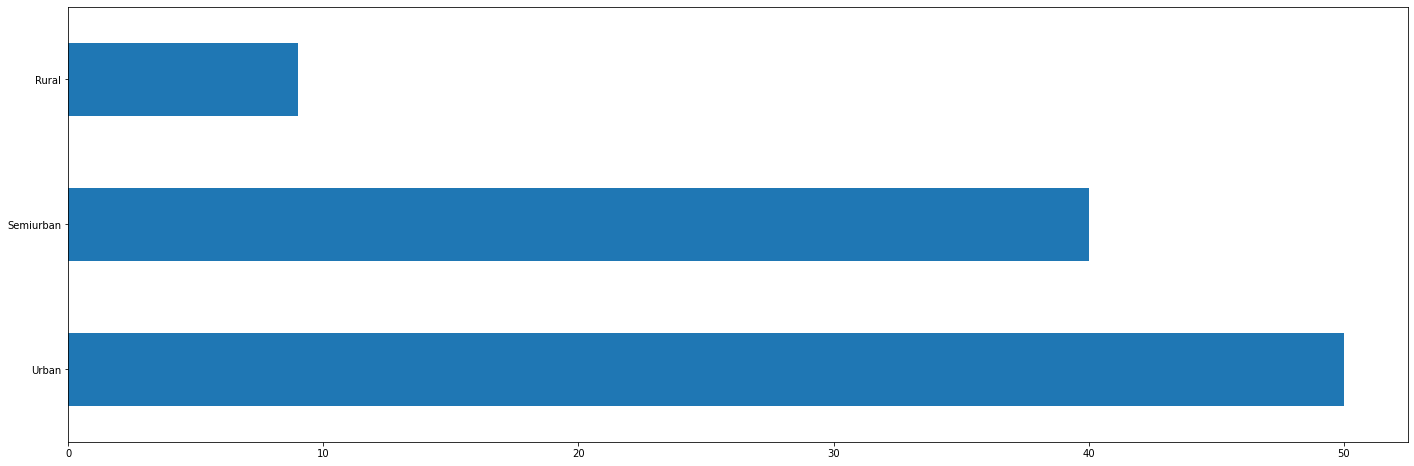

Urban        50
Semiurban    40
Rural         9
Name: PropertyArea, dtype: int64


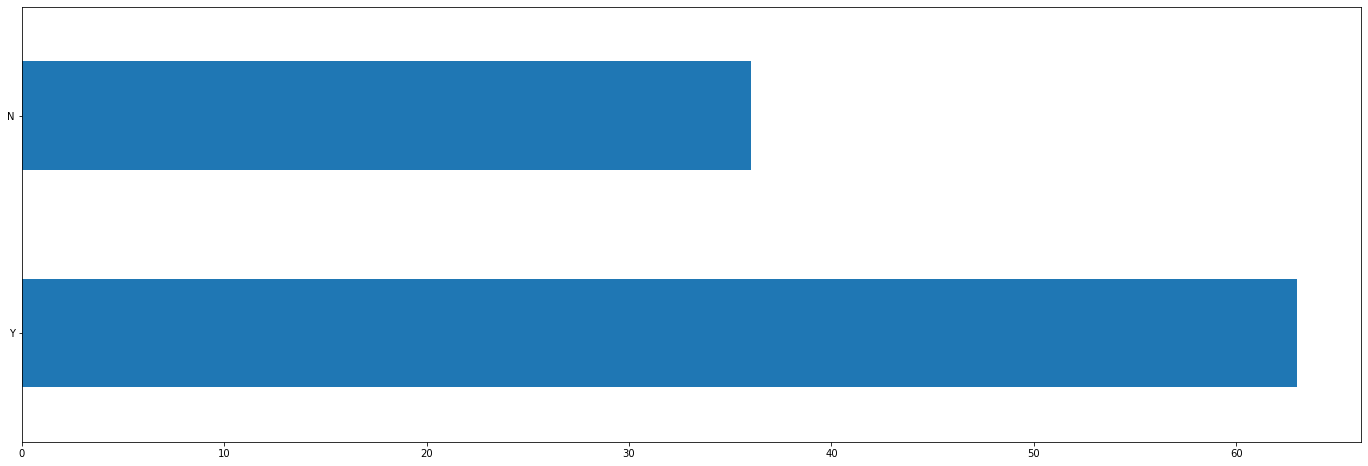

Y    63
N    36
Name: LoanStatus, dtype: int64


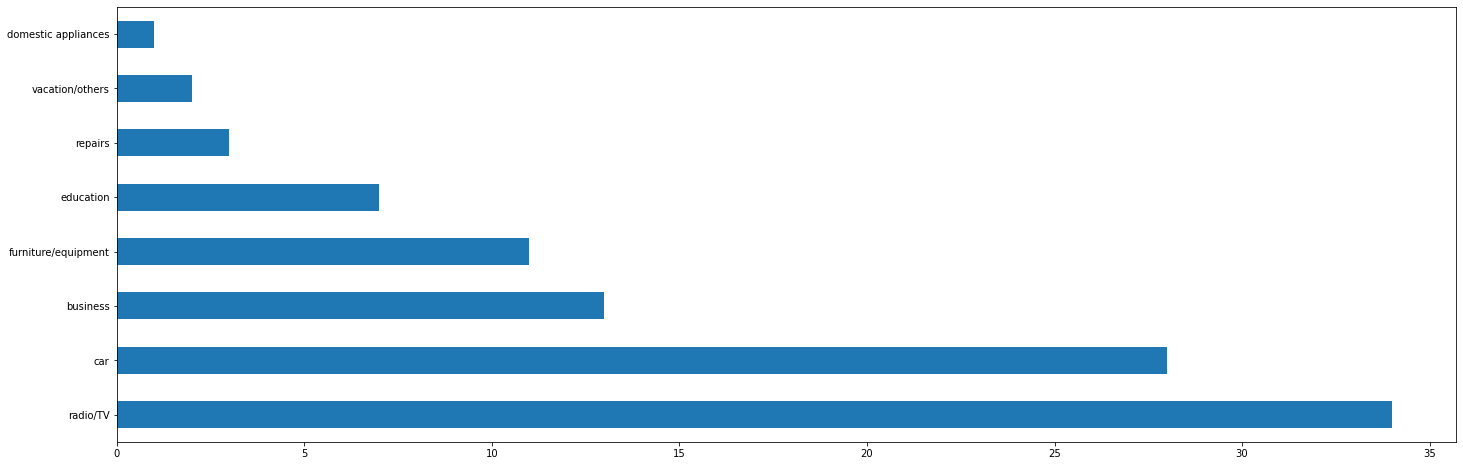

radio/TV               34
car                    28
business               13
furniture/equipment    11
education               7
repairs                 3
vacation/others         2
domestic appliances     1
Name: Purpose, dtype: int64


In [36]:
for k, v in df.iteritems():
  if v.dtype == 'object':
    print(count_values(k, 'barh'))

<Figure size 1728x576 with 0 Axes>

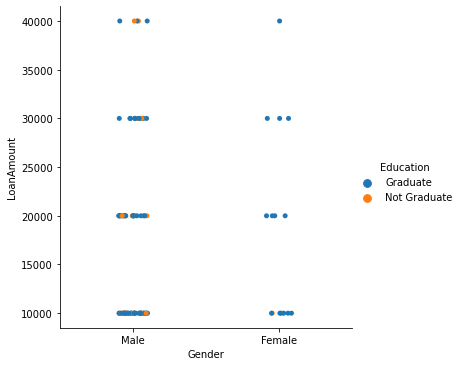

In [41]:
plt.figure(figsize=(24, 8))
sb.catplot(x='Gender', y='LoanAmount', hue='Education', data=df)
plt.show()

/Users/ahmedgaal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ahmedgaal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ahmedgaal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ahmedgaal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ahmedgaal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ahmedgaal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: 

<Figure size 1728x576 with 0 Axes>

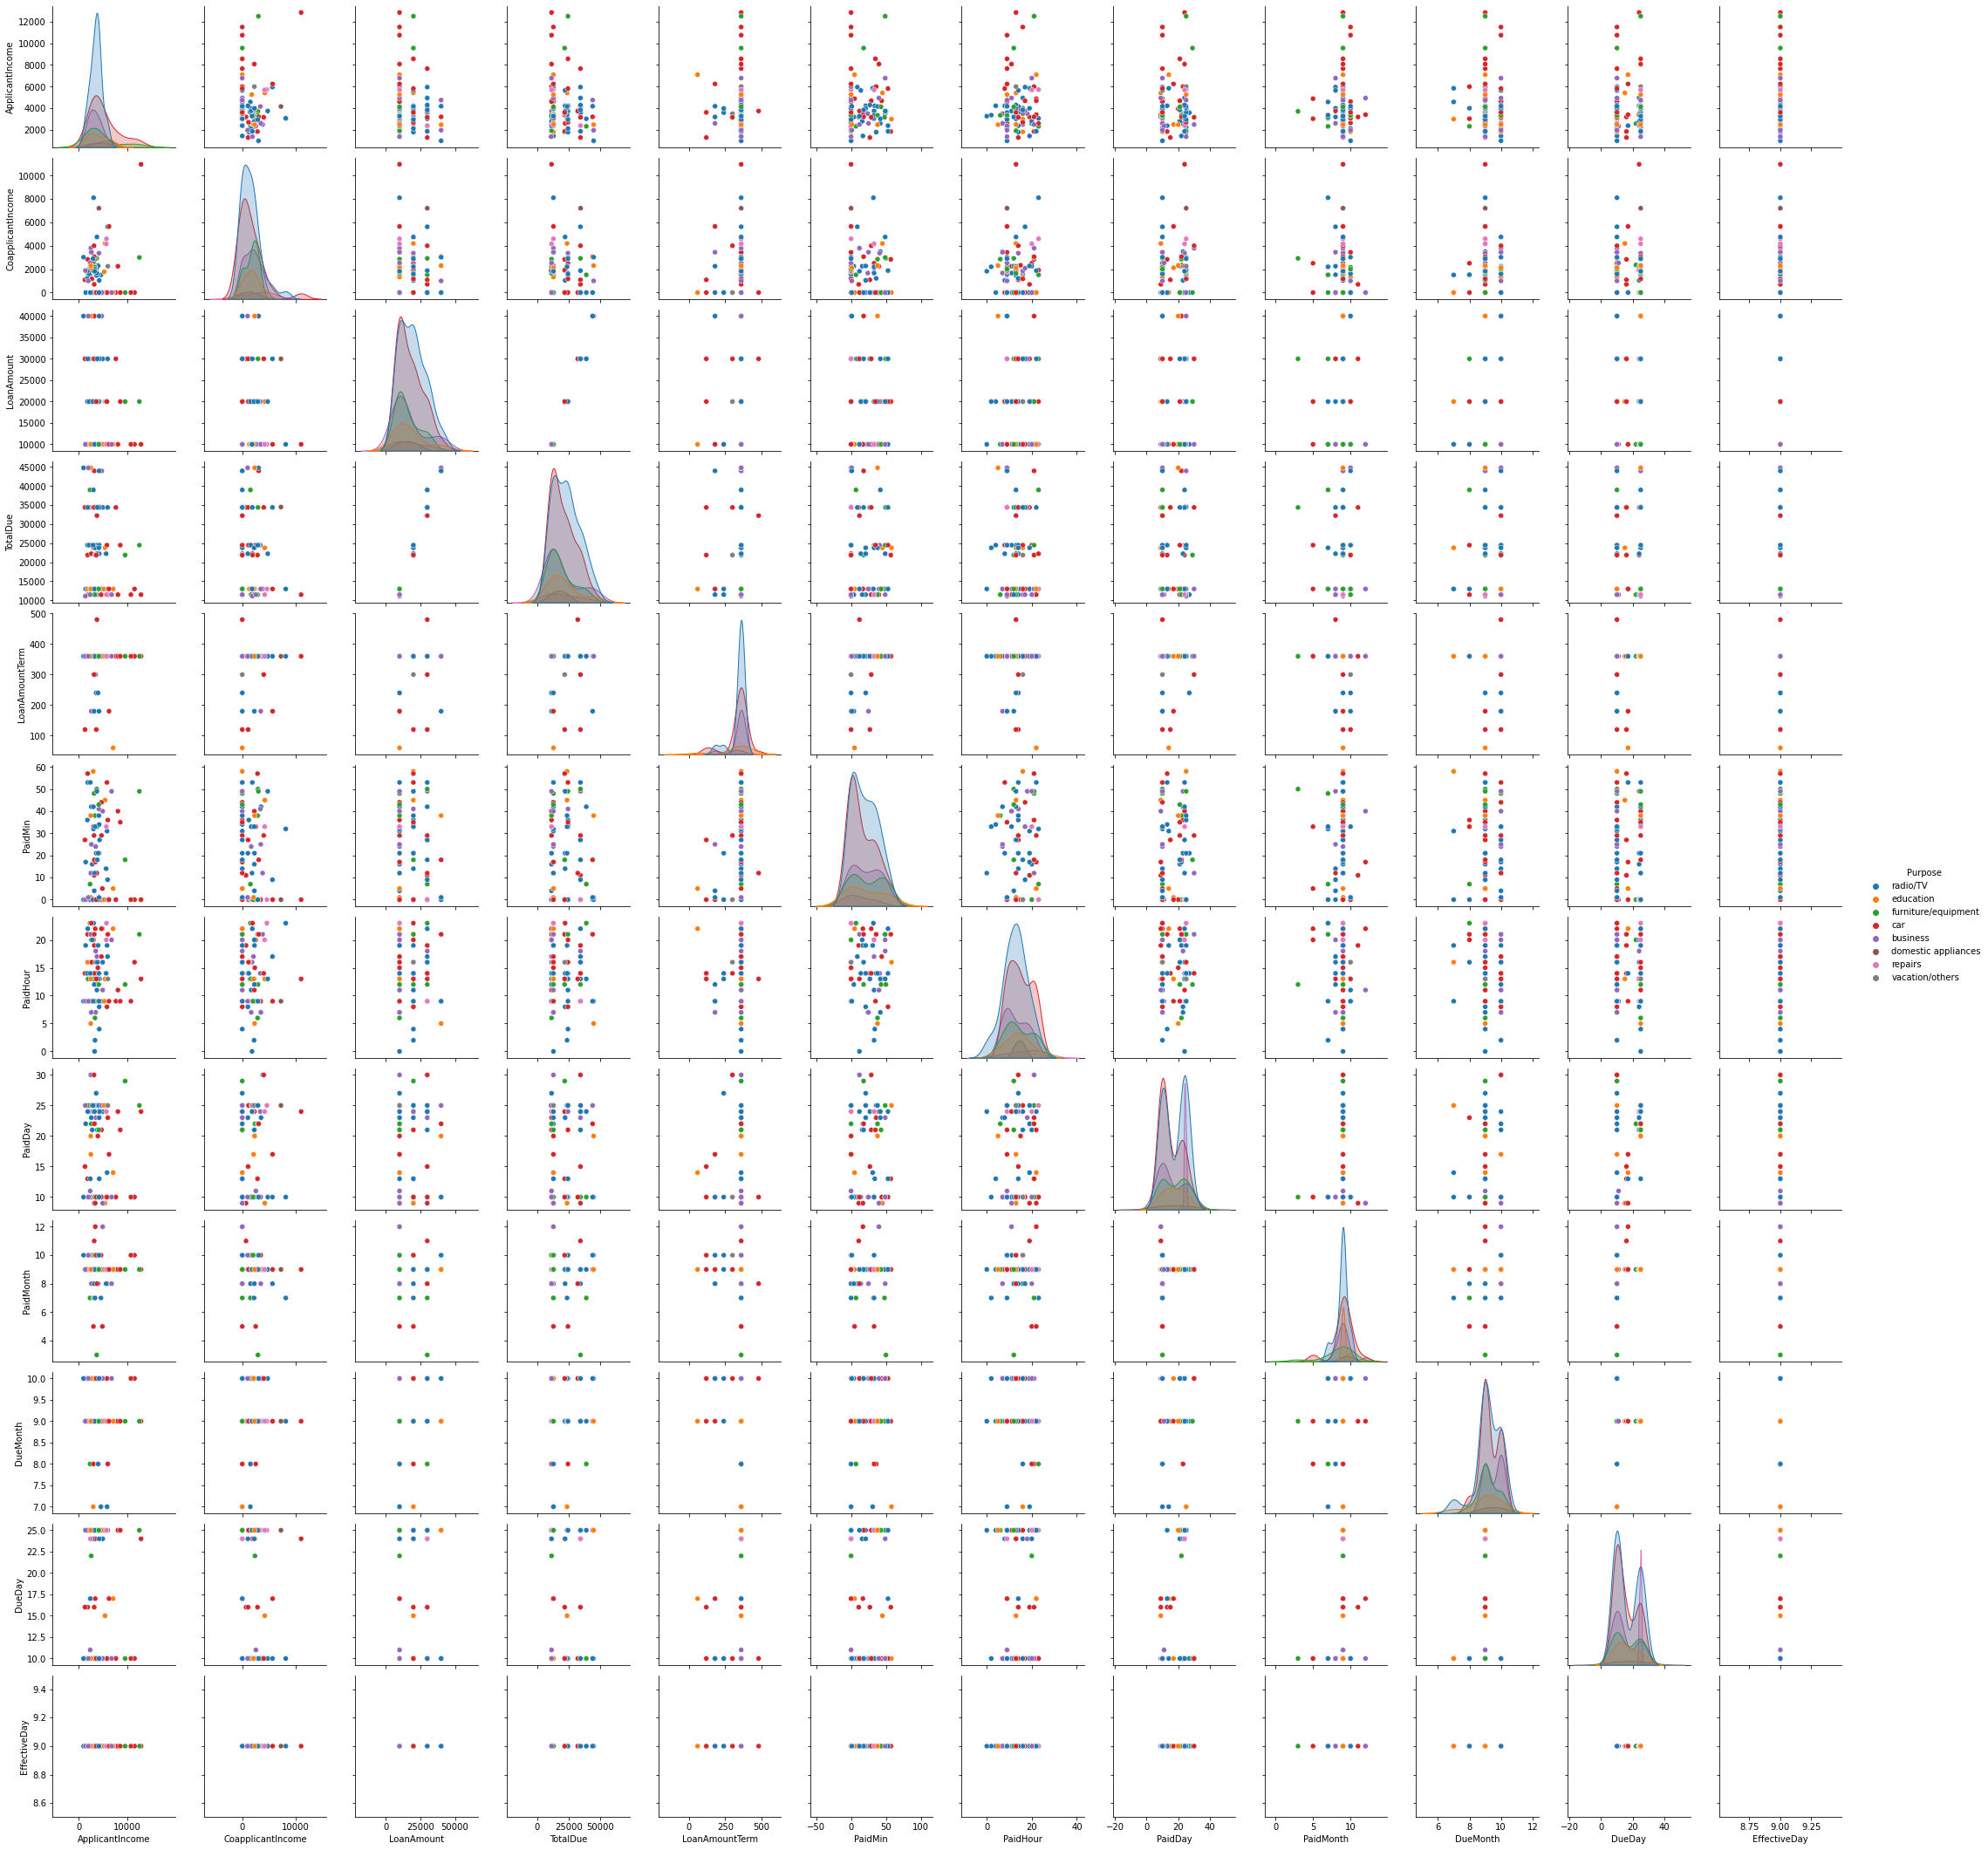

In [42]:
plt.figure(figsize=(24, 8))
sb.pairplot(df, hue='Purpose')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

In [207]:
from sklearn.tree import DecisionTreeClassifier

In [208]:
tre = DecisionTreeClassifier(random_state=0)

In [209]:
tre.fit(df.loc[:, df.columns != 'LoanStatus'], df['LoanStatus'])

DecisionTreeClassifier(random_state=0)

In [210]:
tre.feature_importances_

array([0.035, 0.   , 0.022, 0.   , 0.   , 0.188, 0.007, 0.057, 0.052,
       0.   , 0.   , 0.204, 0.067, 0.21 , 0.084, 0.023, 0.051, 0.   ,
       0.   , 0.   ])

In [216]:
news_cols = df.loc[:, df.columns != 'LoanStatus'].columns

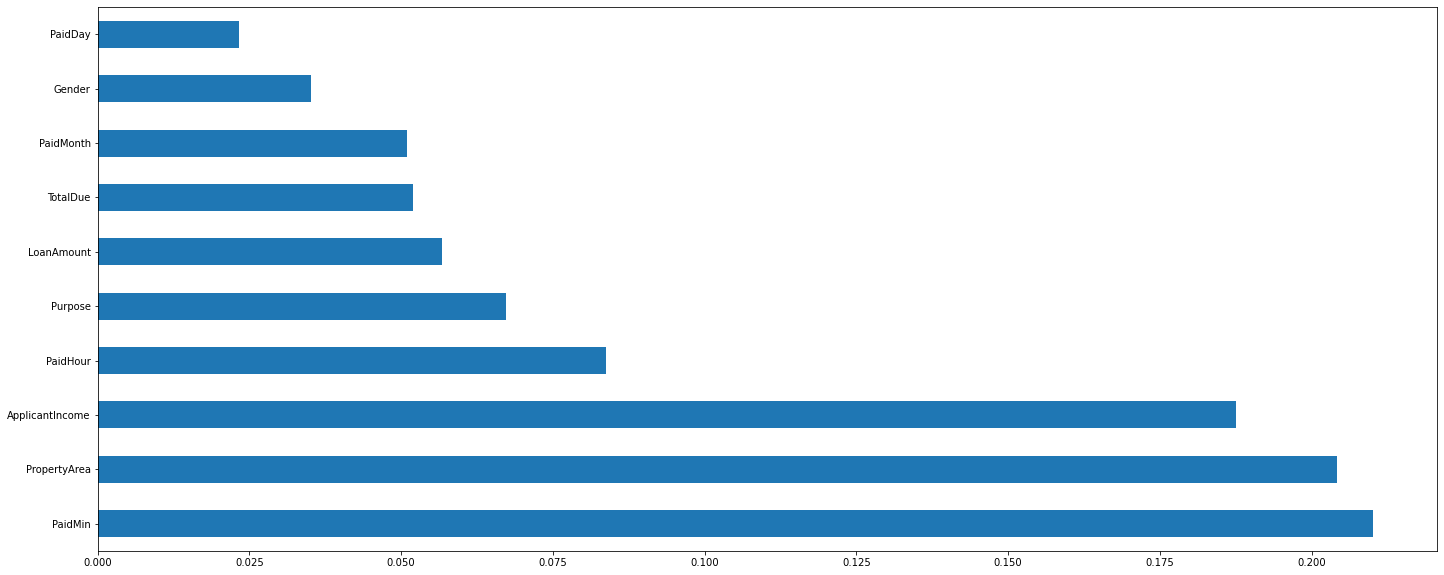

In [217]:
plt.figure(figsize=(24, 10))
pd.Series(
    tre.feature_importances_, index=news_cols
).nlargest(10).plot(kind='barh')
plt.show()

In [64]:
features = ['DueDay', 'PaidDay', 'ApplicantIncome', 'LoanAmount', 'PropertyArea',
            'Married', 'CoapplicantIncome', 'Education']
X = df.loc[:, features]
y = df['LoanStatus']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [66]:
clf_svm = SVC(C=0.1, kernel='linear')

##### **Fit data without scaling**

In [67]:
clf_svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [68]:
clf_svm.score(X_train, y_train)

0.6455696202531646

##### **Fit data after scaling**

In [69]:
clf_svm = SVC(C=0.1, kernel='linear')

In [70]:
scale = StandardScaler()
X_train_scl = scale.fit_transform(X_train)

In [71]:
clf_svm.fit(X_train_scl, y_train)

SVC(C=0.1, kernel='linear')

In [72]:
clf_svm.score(X_train_scl, y_train)

0.6708860759493671

In [73]:
res = cross_val_score(
    clf_svm, X_train_scl, y_train, scoring='accuracy', cv=10, n_jobs=-1,
    verbose=3
)

print(
    "Average Accuracy:", (np.mean(res))
)
print(
    "Accuracy Std Dev:", (np.std(res))
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Average Accuracy: 0.6571428571428571
Accuracy Std Dev: 0.06277998511159624


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.4s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


In [74]:
pred = cross_val_predict(
    clf_svm, X_train_scl, y_train, cv=5, n_jobs=-1, verbose=3
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [75]:
pd.DataFrame(
    confusion_matrix(y_train, pred),
    index=pd.MultiIndex.from_product(
        [['Actual'], ['Negative', 'Positive']]
    ),
    columns=pd.MultiIndex.from_product(
        [['Predicted'], ['Negative', 'Positive']]
    )
)

Predicted         
                 Negative Positive
Actual Negative         1       25
       Positive         2       51

In [76]:
print(
    "Precision Score:", (precision_score(y_train, pred))
)
print(
    "Recall Score:", (recall_score(y_train, pred))
)
print(
    "F1 Score:", (f1_score(y_train, pred))
)

Precision Score: 0.6710526315789473
Recall Score: 0.9622641509433962
F1 Score: 0.7906976744186047


In [77]:
pd.DataFrame(
    confusion_matrix(y_train, clf_svm.predict(scale.fit_transform(X_train))),
    index=pd.MultiIndex.from_product(
        [['Actual'], ['Negative', 'Positive']]
    ),
    columns=pd.MultiIndex.from_product(
        [['Predicted'], ['Negative', 'Positive']]
    )
)

Predicted         
                 Negative Positive
Actual Negative         0       26
       Positive         0       53

### Perform Hyper-Parameter Optimization 

In [78]:
from sklearn.model_selection import GridSearchCV

In [202]:
def param_optimization(estimator, params, x, y, cv:int):
    grd = GridSearchCV(
        estimator, params, scoring='accuracy', n_jobs=-1, cv=cv, verbose=1
    )
    grd.fit(x, y)
    print('Best Paramaters: ', (grd.best_params_))
    print('Best Score: ', (grd.best_score_))
    print('Best Estimator: ', (grd.best_estimator_))
    return

In [203]:
params = {
    'C': np.arange(0.01, 100, 0.5)
}

In [204]:
param_optimization(clf_svm, params, X_train_scl, y_train, cv=5)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Best Paramaters:  {'C': 0.01}
Best Score:  0.6708333333333333
Best Estimator:  SVC(C=0.01, kernel='linear')


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.0s finished


In [205]:
est = SVC(kernel='rbf')

In [206]:
param_optimization(est, params, X_train_scl, y_train, cv=5)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Best Paramaters:  {'C': 1.01}
Best Score:  0.7083333333333333
Best Estimator:  SVC(C=1.01)


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.5s finished


#### Apply Optimised Parameters on the estimator

In [165]:
clf = SVC(C=1.01, kernel='rbf')

In [166]:
clf.fit(X_train_scl, y_train)

SVC(C=1.01)

In [200]:
def mean_accuracy_score(estimator, X, y, cv: int):
    res = cross_val_score(est, X, y, cv=cv, n_jobs=-1, verbose=1,
                            scoring='accuracy')
    score = print('Average Accuracy:', (np.mean(res)))
    std = print('Average Standard Deviation:', (np.std(res)))
    return

### Calculate Metrics
##### Accuracy Score

In [201]:
mean_accuracy_score(clf, X_train_scl, y_train, cv=10)

Average Accuracy: 0.7089285714285715
Average Standard Deviation: 0.11181765860323764


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


##### Precision, Recall and F1 Scores

In [167]:
print('Precision Score:', (precision_score(y_train, clf.predict(X_train_scl))))
print('Recall Score:', (recall_score(y_train, clf.predict(X_train_scl))))
print('F1 Score:', (f1_score(y_train, clf.predict(X_train_scl))))

Precision Score: 0.8
Recall Score: 0.9811320754716981
F1 Score: 0.8813559322033898


##### Weighted precision and recall score.

In [168]:
print('Precision Score:', (precision_score(y_train,clf.predict(X_train_scl),
                                           average='weighted')))
print('Recall Score:', (recall_score(y_train,clf.predict(X_train_scl),
                                        average='weighted')))
print('F1 Score:', (f1_score(y_train,clf.predict(X_train_scl),
                             average='weighted')))

Precision Score: 0.8423146473779385
Recall Score: 0.8227848101265823
F1 Score: 0.80521347350354


##### Confusion Matrix

In [169]:
pd.DataFrame(confusion_matrix(y_train, clf.predict(X_train_scl)),
            index=pd.MultiIndex.from_product(
            [['Actual'], ['Negative', 'Positive']]),
            columns=pd.MultiIndex.from_product(
            [['Predicted'], ['Negative', 'Positive']])
            )

Predicted         
                 Negative Positive
Actual Negative        13       13
       Positive         1       52

### Precision Recall TradeOff

In [170]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

In [171]:
y_scores = cross_val_predict(clf, X_train_scl, y_train, cv=3,
                            method='decision_function')

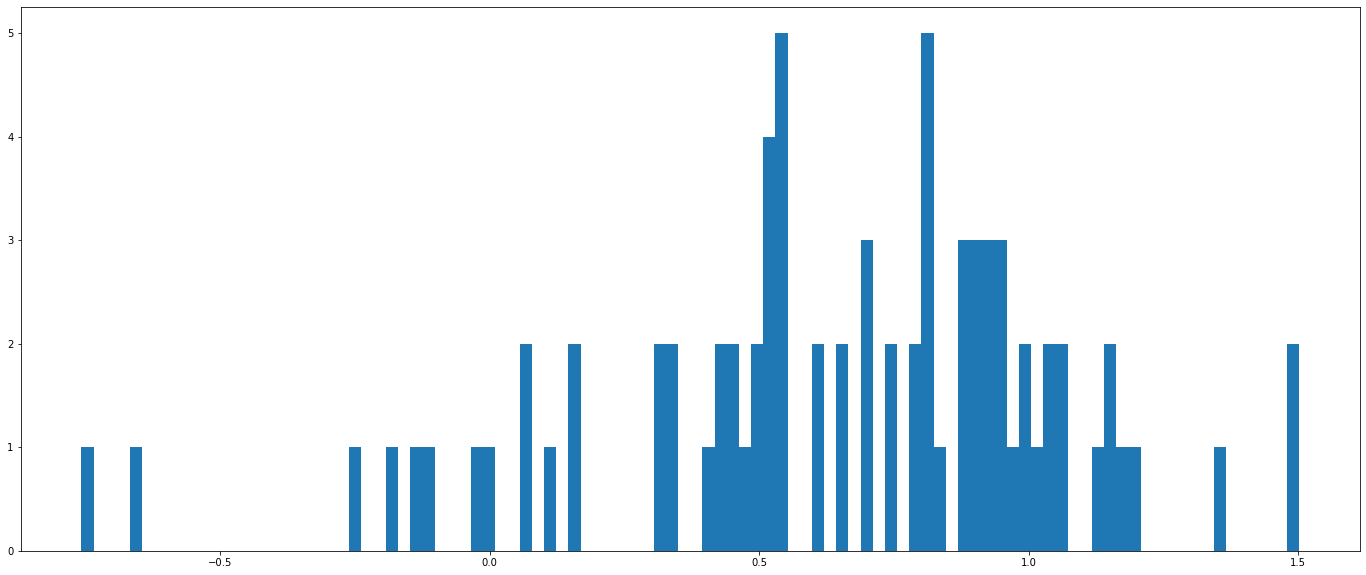

In [172]:
plt.figure(figsize=(24, 10))
plt.hist(y_scores, bins=100)
plt.show()

In [173]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [174]:
def plot_prc_figure(precision, recall, thresh):
  """Method for plotting Precision Recall Curve"""
  plt.figure(figsize=(24, 10))
  plt.plot(thresh, precision[:-1], 'r--', label='Precision')
  plt.plot(thresh, recall[:-1], 'g--', label='Recall')
  plt.title('Precision Recall Curve')
  plt.xlabel('Threshold')
  plt.legend(loc='best')
  plt.ylim([-0.5, 1.5])
  plt.show()
  return

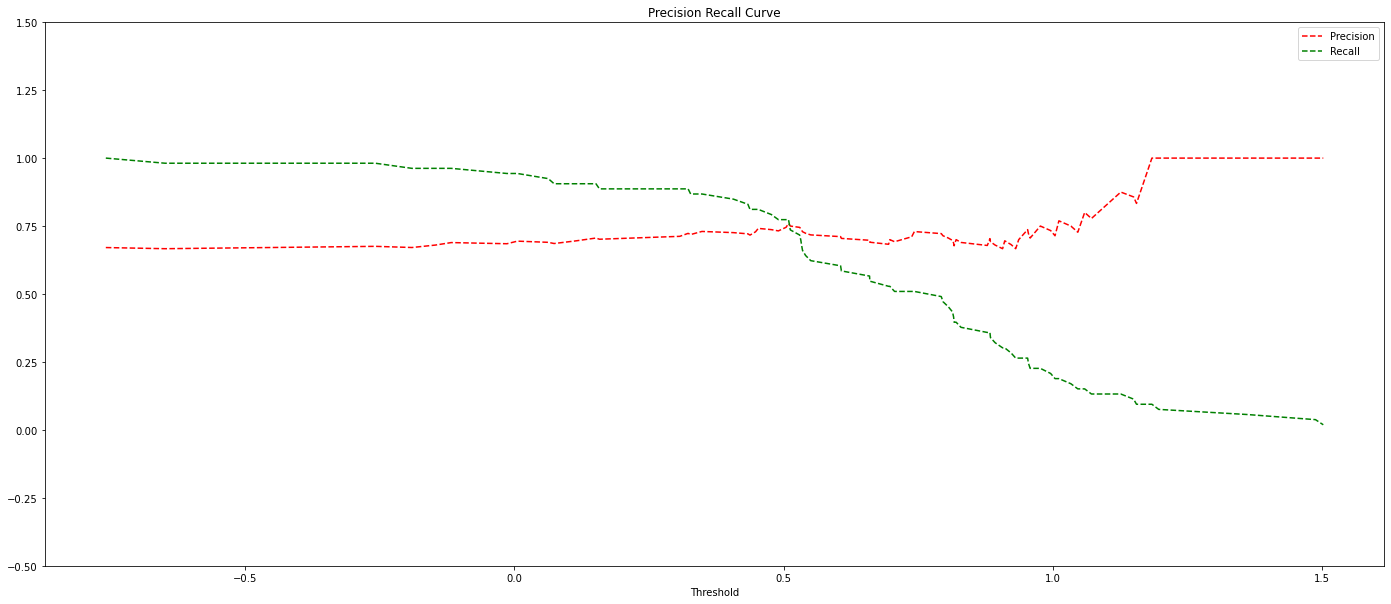

In [175]:
plot_prc_figure(precisions, recalls, thresholds)

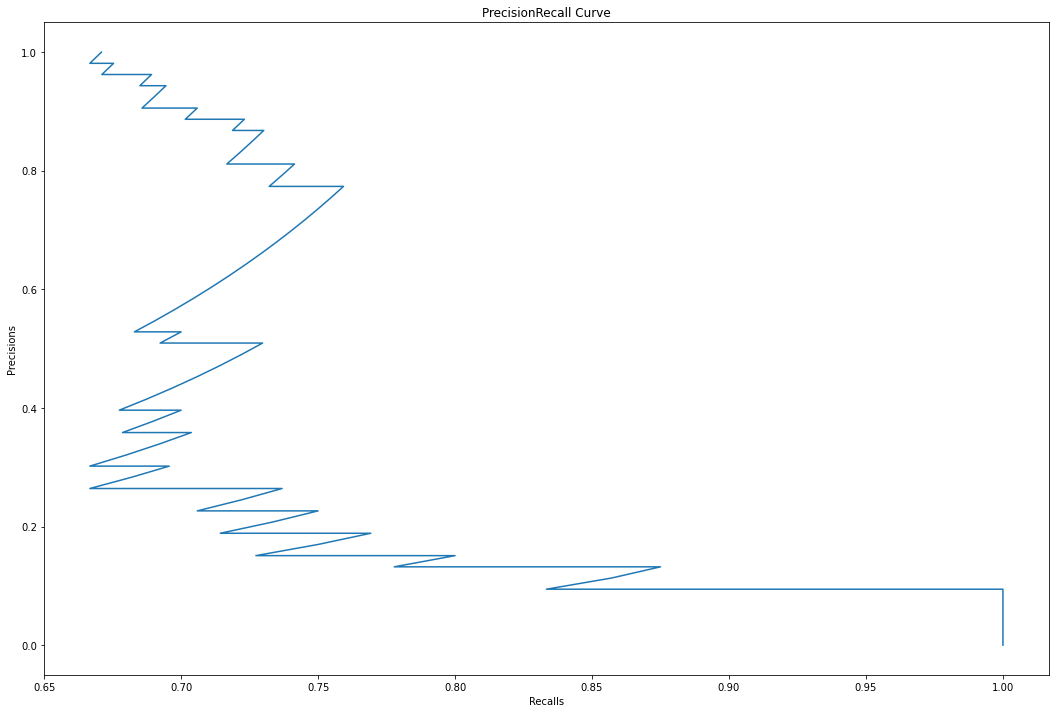

In [176]:
plt.figure(figsize=(18, 12))
plt.plot(precisions, recalls)
plt.xlabel('Recalls')
plt.ylabel('Precisions')
plt.title('PrecisionRecall Curve')
plt.show()

#### Altering Precision

In [223]:
len(precisions)
len(thresholds)

41

In [178]:
idx = len(precisions[precisions < 0.9])
thresholds[idx]

1.1836408253503607

In [179]:
y_ppred = (y_scores > thresholds[idx])

In [182]:
print('Precision Score:', (precision_score(y_train, y_ppred)))
print('Recall Score:', (recall_score(y_train, y_ppred)))
print('F1 Score:', (f1_score(y_train, y_ppred)))

Precision Score: 1.0
Recall Score: 0.07547169811320754
F1 Score: 0.14035087719298245


In [181]:
print('Precision Score:', (precision_score(y_train, y_ppred,
                                           average='weighted')))
print('Recall Score:', (recall_score(y_train, y_ppred,
                                        average='weighted')))
print('F1 Score:', (f1_score(y_train, y_ppred,
                             average='weighted')))

Precision Score: 0.7849789029535865
Recall Score: 0.379746835443038
F1 Score: 0.26360424183657544


#### Altering Recall

In [184]:
idx_rec = len(recalls[recalls > 0.9])
y_rec = (y_scores > thresholds[idx_rec])

In [185]:
print('Precision Score:', (precision_score(y_train, y_rec)))
print('Recall Score:', (recall_score(y_train, y_rec)))
print('F1 Score:', (f1_score(y_train, y_rec)))

Precision Score: 0.7121212121212122
Recall Score: 0.8867924528301887
F1 Score: 0.7899159663865547


In [186]:
print('Precision Score:', (precision_score(y_train, y_rec, average='weighted')))
print('Recall Score:', (recall_score(y_train, y_rec, average='weighted')))
print('F1 Score:', (f1_score(y_train, y_rec, average='weighted')))

Precision Score: 0.6549673954737246
Recall Score: 0.6835443037974683
F1 Score: 0.6480870829344397


### Receiver Operating Characteristics (R.O.C) Curve

In [187]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [192]:
def roc_curve_plot(fpr, tpr, label=None):
    roc = print('ROC Score:', roc_auc_score(y_train, y_scores))
    plt.figure(figsize=(18, 10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    return roc

ROC Score: 0.5921625544267054


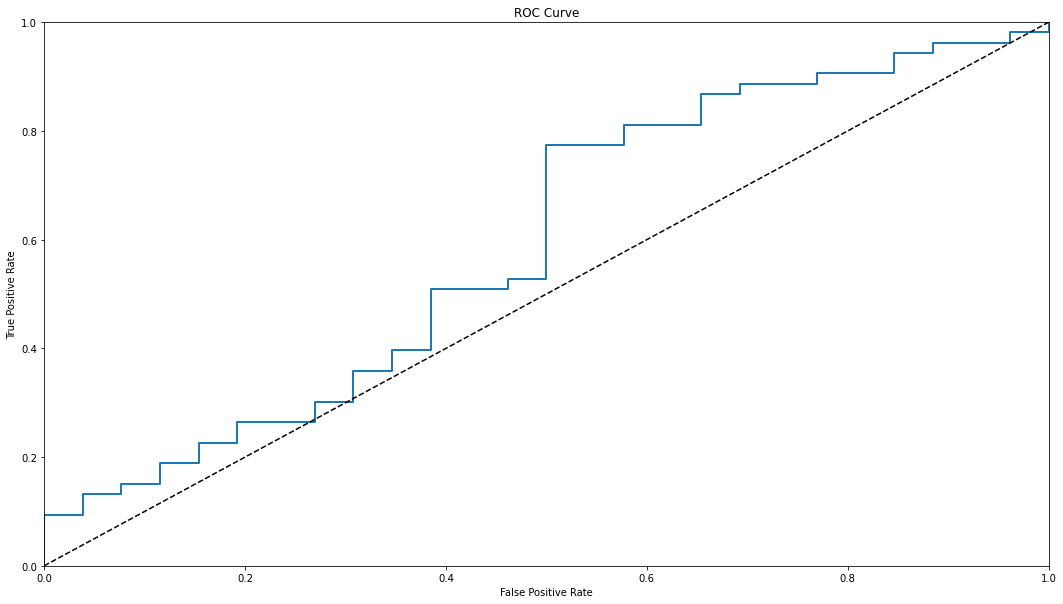

In [193]:
roc_curve_plot(fpr, tpr)